In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [8]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [20]:
df.nunique()


Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
Experience_Level_label             2
dtype: int64

In [27]:
print(df.isnull().sum())

Age                                0
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                       0
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                                0
Experience_Level_label           191
dtype: int64


In [28]:
df['Experience_Level'].value_counts()


Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

In [32]:
mapping = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}
df['Experience_Level_label'] = df['Experience_Level'].map(mapping).astype('category')


In [33]:
print(df.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Experience_Level_label           0
dtype: int64


In [34]:
print(df.dtypes)

Age                                 int64
Gender                           category
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                             int64
Avg_BPM                             int64
Resting_BPM                         int64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                     category
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)       int64
Experience_Level                    int64
BMI                               float64
Experience_Level_label           category
dtype: object


In [35]:
print(df.duplicated().sum())

0


In [36]:
print(df.describe().loc[['min', 'max']])

      Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
min  18.0         40.0         1.5    160.0    120.0         50.0   
max  59.0        129.9         2.0    199.0    169.0         74.0   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
min                       0.5            303.0            10.0   
max                       2.0           1783.0            35.0   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
min                    1.5                            2.0               1.0   
max                    3.7                            5.0               3.0   

       BMI  
min  12.32  
max  49.84  


In [41]:
print(list(numeric_cols))

# MEDIAS
print("\n--- MEDIA ---")
print(df[numeric_cols].mean())

['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

--- MEDIA ---
Age                               38.683453
Weight (kg)                       73.854676
Height (m)                         1.722580
Max_BPM                          179.883864
Avg_BPM                          143.766701
Resting_BPM                       62.223022
Session_Duration (hours)           1.256423
Calories_Burned                  905.422405
Fat_Percentage                    24.976773
Water_Intake (liters)              2.626619
Workout_Frequency (days/week)      3.321686
Experience_Level                   1.809866
BMI                               24.912127
dtype: float64


In [42]:
print(df[numeric_cols].median())

Age                               40.00
Weight (kg)                       70.00
Height (m)                         1.71
Max_BPM                          180.00
Avg_BPM                          143.00
Resting_BPM                       62.00
Session_Duration (hours)           1.26
Calories_Burned                  893.00
Fat_Percentage                    26.20
Water_Intake (liters)              2.60
Workout_Frequency (days/week)      3.00
Experience_Level                   2.00
BMI                               24.16
dtype: float64


In [44]:
print(df[numeric_cols].mode().iloc[0])

Age                               43.00
Weight (kg)                       57.70
Height (m)                         1.62
Max_BPM                          198.00
Avg_BPM                          132.00
Resting_BPM                       50.00
Session_Duration (hours)           1.03
Calories_Burned                  883.00
Fat_Percentage                    28.10
Water_Intake (liters)              3.50
Workout_Frequency (days/week)      3.00
Experience_Level                   2.00
BMI                               23.53
Name: 0, dtype: float64


In [46]:
range_values = df[numeric_cols].max() - df[numeric_cols].min()
print(range_values)

Age                                41.00
Weight (kg)                        89.90
Height (m)                          0.50
Max_BPM                            39.00
Avg_BPM                            49.00
Resting_BPM                        24.00
Session_Duration (hours)            1.50
Calories_Burned                  1480.00
Fat_Percentage                     25.00
Water_Intake (liters)               2.20
Workout_Frequency (days/week)       3.00
Experience_Level                    2.00
BMI                                37.52
dtype: float64


In [47]:
print(df[numeric_cols].var())

Age                                148.375004
Weight (kg)                        449.758077
Height (m)                           0.016312
Max_BPM                            132.841437
Avg_BPM                            205.781935
Resting_BPM                         53.685807
Session_Duration (hours)             0.117672
Calories_Burned                  74333.396493
Fat_Percentage                      39.180324
Water_Intake (liters)                0.360206
Workout_Frequency (days/week)        0.833655
Experience_Level                     0.547145
BMI                                 44.367314
dtype: float64


In [49]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                               21.00
Weight (kg)                       27.90
Height (m)                         0.18
Max_BPM                           20.00
Avg_BPM                           25.00
Resting_BPM                       12.00
Session_Duration (hours)           0.42
Calories_Burned                  356.00
Fat_Percentage                     8.00
Water_Intake (liters)              0.90
Workout_Frequency (days/week)      1.00
Experience_Level                   1.00
BMI                                8.45
dtype: float64


In [56]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Columnas numéricas analizadas:")
print(list(numeric_cols))
percentiles = df[numeric_cols].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print("\n--- PERCENTILES (1%, 25%, 50%, 75%, 99%) ---")
print(percentiles)



Columnas numéricas analizadas:
['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

--- PERCENTILES (1%, 25%, 50%, 75%, 99%) ---
       Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0.01  18.0       41.172        1.50    160.0    120.0         50.0   
0.25  28.0       58.100        1.62    170.0    131.0         56.0   
0.50  40.0       70.000        1.71    180.0    143.0         62.0   
0.75  49.0       86.000        1.80    190.0    156.0         68.0   
0.99  59.0      127.728        1.99    199.0    169.0         74.0   

      Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0.01                      0.53           362.72          10.472   
0.25                      1.04           720.00          21.300   
0.50                      1.26           893.00          26.200   
0.75      

In [57]:
print("\nQ2 (50%) - Mediana:")
print(Q2)



Q2 (50%) - Mediana:
Age                               40.00
Weight (kg)                       70.00
Height (m)                         1.71
Max_BPM                          180.00
Avg_BPM                          143.00
Resting_BPM                       62.00
Session_Duration (hours)           1.26
Calories_Burned                  893.00
Fat_Percentage                    26.20
Water_Intake (liters)              2.60
Workout_Frequency (days/week)      3.00
Experience_Level                   2.00
BMI                               24.16
Name: 0.5, dtype: float64


In [58]:
print("\nQ3 (75%):")
print(Q3)


Q3 (75%):
Age                                49.00
Weight (kg)                        86.00
Height (m)                          1.80
Max_BPM                           190.00
Avg_BPM                           156.00
Resting_BPM                        68.00
Session_Duration (hours)            1.46
Calories_Burned                  1076.00
Fat_Percentage                     29.30
Water_Intake (liters)               3.10
Workout_Frequency (days/week)       4.00
Experience_Level                    2.00
BMI                                28.56
Name: 0.75, dtype: float64


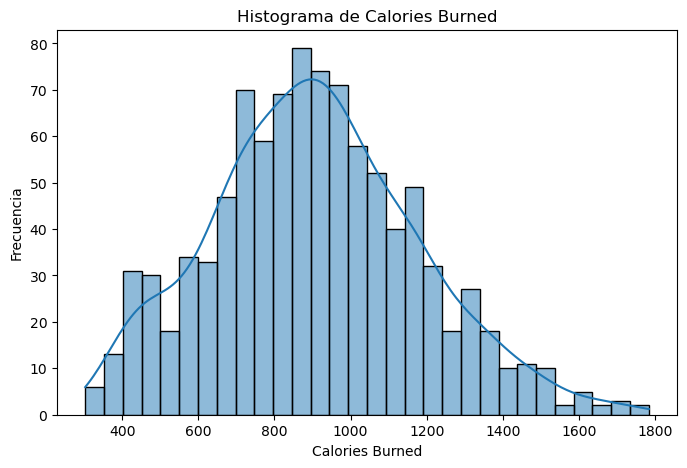

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Calories_Burned'], bins=30, kde=True)
plt.title("Histograma de Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Frecuencia")
plt.show()


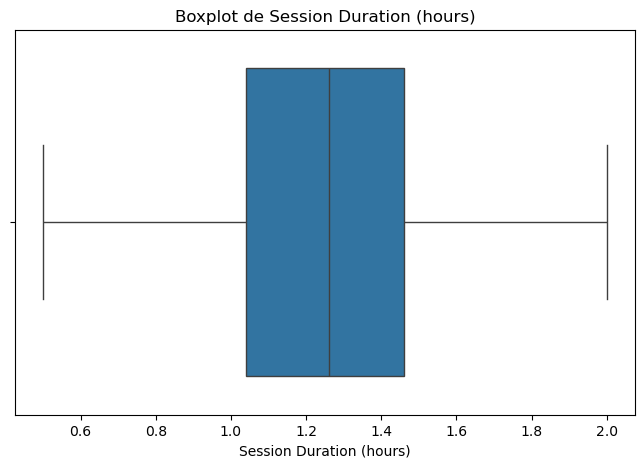

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Session_Duration (hours)'])
plt.title("Boxplot de Session Duration (hours)")
plt.xlabel("Session Duration (hours)")
plt.show()


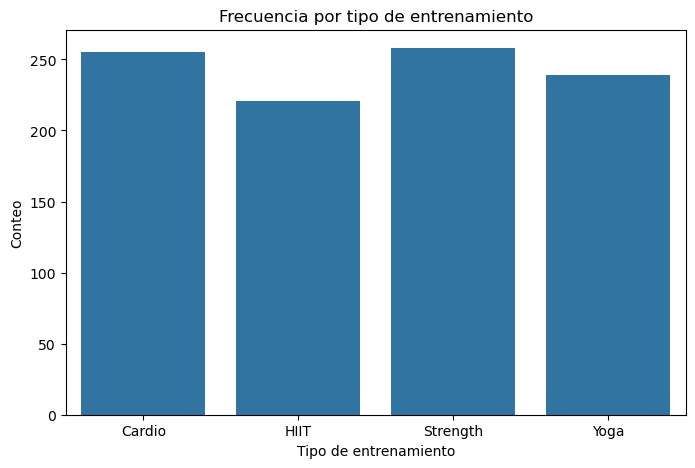

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Workout_Type'])
plt.title("Frecuencia por tipo de entrenamiento")
plt.xlabel("Tipo de entrenamiento")
plt.ylabel("Conteo")
plt.show()


# Problema principal y objetivo

La práctica a realizar consiste en analizar un dataset e indicar el problema principal que se desea resolver utilizando Python y la técnica necesaria para realizarlo, subiendo posteriormente el notebook a GitHub.

El dataset contiene información física, hábitos y variables de entrenamiento de los miembros de un gimnasio. El objetivo del análisis es comprender qué factores influyen en el nivel de experiencia de un usuario, representado en la columna experience level (Beginner, Intermediate, Advanced).
El problema principal es identificar qué características como la duración de la sesión, la frecuencia semanal de entrenamiento, las calorías quemadas, el IMC y el porcentaje de grasa corporal afectan al nivel de experiencia de cada miembro.


## Técnica escogida

Para este dataset escogeremos la técnica de clasificación, ya que la variable target (experience level) es categórica, el propósito será predecir si un usuario es principiante, intermedio o experto a partir de sus características físicas y hábitos de entrenamiento.

### Posibles sesgos

* Este dataset no representa a todo el colectivo de personas que realizan actividad física, simplemente a los miembros de un gimnasio, por lo que limita la generalización de los resultados
* La variable objetivo puede presentar mucha diferencia entre sus diferentes categorías, este desbalance puede hacer que se tienda a favorecer a la categorías con mas usuarios
* Si las variables se han obtenido mediante cuestionarios, puede afectar a la fiabilidad de los datos, ya que muchas personas pueden haber dicho datos no del todo reales al no acordarse
* Algunas variables como las calorías quemadas o la frecuencia cardíaca dependen del dispositivo con el que se han medido en cada usuario, por lo que ya hace que dependa mas del método de medición que de la propia experiencia del usuario

### Tipos de variables

| **CUALITATIVAS NOMINALES** | **CUALITATIVAS ORDINALES** | **CUANTITATIVAS DISCRETAS** | **CUANTITATIVAS CONTINUAS** |
|----------------------------|----------------------------|-----------------------------|-----------------------------|
| Gender                     | Experience Level           | Age                         | Weight                      |
| Workout Type               |                            | Max BPM                     | Height                      |
|                            |                            | Avg BPM                     | Session Duration            |
|                            |                            | Resting BPM                 | Calories burned             |
|                            |                            | Workout Frequency           | Fat percentage              |
|                            |                            |                             | Water Intake                |
|                            |                            |                             | BMI                         |

### Valores únicos por variable

* Age                               42
* Gender                             2
* Weight (kg)                      532
* Height (m)                        51
* Max_BPM                           40
* Avg_BPM                           50
* Resting_BPM                       25
* Session_Duration (hours)         147
* Calories_Burned                  621
* Workout_Type                       4
* Fat_Percentage                   239
* Water_Intake (liters)             23
* Workout_Frequency (days/week)      4
* Experience_Level                   3
* BMI                              771
* Experience_Level_label             2

### Identificación de errores en los datos

* Mediante df.isnull().sum(), se ha comprobado si existen columnas con datos faltantes. Todo está correcto
* Con df.dtypes hemos podido ver cada tipo de variable, observando que todas corresponden correctamente
* Gracias a df.duplicated().sum() hemos visto si existen filas repetidas, lo cual da 0
* Y con df.describe().loc[['min', 'max']] hemos podido ver si había alguna variable fuera de un rango lógico, pero todas estaban dentro de rangos posibles

### Media, Mediana y Moda

* La *media* representa el promedio de cada variable numérica y nos permite tner una visión general del nivel promedio de las mediciones, podemos analizar esto con print(df[numeric_cols].mean()), habiendo printeado previante numeric cols para referirnos a las columnas numéricas
* Age                               38.683453
* Weight (kg)                       73.854676
* Height (m)                         1.722580
* Max_BPM                          179.883864
* Avg_BPM                          143.766701
* Resting_BPM                       62.223022
* Session_Duration (hours)           1.256423
* Calories_Burned                  905.422405
* Fat_Percentage                    24.976773
* Water_Intake (liters)              2.626619
* Workout_Frequency (days/week)      3.321686
* Experience_Level                   1.809866
* BMI                               24.912127

* La *mediana* nos indica el valor central de la distribución, la podemos ver con print(df[numeric_cols].median())
* Age                               40.00
* Weight (kg)                       70.00
* Height (m)                         1.71
* Max_BPM                          180.00
* Avg_BPM                          143.00
* Resting_BPM                       62.00
* Session_Duration (hours)           1.26
* Calories_Burned                  893.00
* Fat_Percentage                    26.20
* Water_Intake (liters)              2.60
* Workout_Frequency (days/week)      3.00
* Experience_Level                   2.00
* BMI                               24.16

* La *moda* nos permite ver el valor más repetido en cada variable, lo podemos ver con print(df[numeric_cols].mode().iloc[0])
* Age                               43.00
* Weight (kg)                       57.70
* Height (m)                         1.62
* Max_BPM                          198.00
* Avg_BPM                          132.00
* Resting_BPM                       50.00
* Session_Duration (hours)           1.03
* Calories_Burned                  883.00
* Fat_Percentage                    28.10
* Water_Intake (liters)              3.50
* Workout_Frequency (days/week)      3.00
* Experience_Level                   2.00
* BMI                               23.53

### Rango, Varianza y Rango Intercuartílico

* El *rango* se obtiene restando el valor mínimo al máximo de cada variable, lo podemos ver con print(range_values)
* Age                                41.00
* Weight (kg)                        89.90
* Height (m)                          0.50
* Max_BPM                            39.00
* Avg_BPM                            49.00
* Resting_BPM                        24.00
* Session_Duration (hours)            1.50
* Calories_Burned                  1480.00
* Fat_Percentage                     25.00
* Water_Intake (liters)               2.20
* Workout_Frequency (days/week)       3.00
* Experience_Level                    2.00
* BMI                                37.52


* La *varianza* nos permite saber cuanto se alejan los datos de las variables de la media, lo podemos ver con print(df[numeric_cols].var())
* Age                                148.375004
* Weight (kg)                        449.758077
* Height (m)                           0.016312
* Max_BPM                            132.841437
* Avg_BPM                            205.781935
* Resting_BPM                         53.685807
* Session_Duration (hours)             0.117672
*Calories_Burned                  74333.396493
* Fat_Percentage                      39.180324
* Water_Intake (liters)                0.360206
* Workout_Frequency (days/week)        0.833655
* Experience_Level                     0.547145
* BMI                                 44.367314

* Por último, el *IQR* nos permite ver como de dispersos estan los datos centrales de la distribución
* Age                               21.00
* Weight (kg)                       27.90
* Height (m)                         0.18
* Max_BPM                           20.00
* Avg_BPM                           25.00
* Resting_BPM                       12.00
* Session_Duration (hours)           0.42
* Calories_Burned                  356.00
* Fat_Percentage                     8.00
* Water_Intake (liters)              0.90
* Workout_Frequency (days/week)      1.00
* Experience_Level                   1.00
* BMI                                8.45

### Percentiles y Cuartiles

Los *percentiles* indican el valor por debajo del cual se encuentra un determinado porcentaje de los datos obtenidos, para analizar esto hemos utilizado los percentiles del 25%, 50% (mediana) y 75%, ya que son los mas comunes. Estos percentiles nos ayudan a ver cómo estan repartidos los datos y si la variable está muy dispersa o no.
* --- PERCENTILES (1%, 25%, 50%, 75%, 99%) ---
*        Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
* 0.01  18.0       41.172        1.50    160.0    120.0         50.0   
* 0.25  28.0       58.100        1.62    170.0    131.0         56.0   
* 0.50  40.0       70.000        1.71    180.0    143.0         62.0   
* 0.75  49.0       86.000        1.80    190.0    156.0         68.0   
* 0.99  59.0      127.728        1.99    199.0    169.0         74.0   
   *    Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
* 0.01                      0.53           362.72          10.472   
* 0.25                      1.04           720.00          21.300   
* 0.50                      1.26           893.00          26.200   
* 0.75                      1.46          1076.00          29.300   
* 0.99                      1.98          1604.72          34.800   
*       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
* 0.01                    1.5                            2.0               1.0   
* 0.25                    2.2                            3.0               1.0   
* 0.50                    2.6                            3.0               2.0   
* 0.75                    3.1                            4.0               2.0   
* 0.99                    3.7                            5.0               3.0   
 *          BMI  
* 0.01  13.3744  
* 0.25  20.1100  
* 0.50  24.1600  
* 0.75  28.5600  
* 0.99  44.9240  
Los *cuartiles* permiten ver la parte central de la distribución y sirven para calcular el IQR, se suelen utilizar como: 
* Q1= 25% (percentiles)
* Q2= 50%
* Q3= 75%
* **Q1 (25%):**
* Age                               28.00
* Weight (kg)                       58.10
* Height (m)                         1.62
* Max_BPM                          170.00
* Avg_BPM                          131.00
* Resting_BPM                       56.00
* Session_Duration (hours)           1.04
* Calories_Burned                  720.00
* Fat_Percentage                    21.30
* Water_Intake (liters)              2.20
* Workout_Frequency (days/week)      3.00
* Experience_Level                   1.00
* BMI                               20.11
* Name: 0.25, dtype: float64
* **Q2 (50%) - Mediana:**
* Age                               40.00
* Weight (kg)                       70.00
* Height (m)                         1.71
* Max_BPM                          180.00
* Avg_BPM                          143.00
* Resting_BPM                       62.00
* Session_Duration (hours)           1.26
* Calories_Burned                  893.00
* Fat_Percentage                    26.20
* Water_Intake (liters)              2.60
* Workout_Frequency (days/week)      3.00
* Experience_Level                   2.00
* BMI                               24.16
* **Q3 (75%):**
* Age                                49.00
* Weight (kg)                        86.00
* Height (m)                          1.80
* Max_BPM                           190.00
* Avg_BPM                           156.00
* Resting_BPM                        68.00
* Session_Duration (hours)            1.46
* Calories_Burned                  1076.00
* Fat_Percentage                     29.30
* Water_Intake (liters)               3.10
* Workout_Frequency (days/week)       4.00
* Experience_Level                    2.00
* BMI                                28.56

### GRÁFICOS RELEVANTES

**HISTOGRAMA DE VARIABLE CLAVE (CALORÍAS QUEMADAS)**
* ![alt text](4ee6ef4d-9c9a-441b-a616-2c09ee49a04d.png)

**BOXPLOT PARA OUTLIERS (DURACIÓN DE LA SESIÓN)**
* ![alt text](77a91635-73f3-41da-8566-582e88d2654b.png)

**GRÁFICO DE BARRAS VARIABLE CATEGÓRICA (TIPO DE ENTRNAMIENTO)**
* ![alt text](bf7c7e36-206d-484b-9140-cfb5728cdef0.png)